# NAS'A Giriş ve Temel Kavramlar
1. Otomatik makine öğrenme modellerini gerçek dünya problemlerine uygulama sürecini uçtan uca otomatikleştirmeyi amaçlar.
2. Geleneksel ML süreçleri şunları gerektirir.
*   Veri ön işleme
*   Özellik mühendisliği
*   Model Seçimi
*   Hiperparametre optimizasyonu
3. NAS: belirli bir veri seti ve görev için ImageNet üzerinde görüntü sınıflandırma en iyi performansı veren yapay sinir ağı mimarisini otomatik olarak keşfetme sürecidir. Bu süreç "öğrenmeyi öğrenmek"olarak da adlandırabilir.
4. NAS'ın 3 Temel süreci
  * Arama Uzayı:Olası tüm mimarilerin kümesi,katman tipleri,bağlantılar
  * Arama Stratejisi: arama uzayında en iyi mimariyi bulmak için kullanılan algoritma
  * Değerlendirme Stratejisi: bulunan bir mimarinin performansını tam eğitmeden hızlıca tahmin etme yöntemi.
5. Neden NAS önemli?
  * insan eforundan tasarruf
  * sota performansı
  * demokratikleşme
  * donanım uyumluluğu
6. En büyük zorlukları: yüksek maliyet
7. çözümü verimlilik
8. Arama Uzayı nedir?
*   Global arama uzayı:tüm ağ baştan sona tasarlanır.
*   Hücre tabanlı arama uzayı: tekrarlanan bir hücre uzayı yapısı aranır.
9. NAS Algoritmaları:Pekiştirmeli öğrenme(RL) ve Evrimsel Hesaplama(Evolutionary).
10. Pekiştirmeli Öğrenme(RL)ile NAS
*  Controller:(RNN) bir mimariyi tanımlayan hiperparamereleri sırayla üretir.
 *  Trainer:Üretilen mimari (Chid Network)eğitilir ve doğrulama setindeki başarısı ölçülür.
*   Reward: Başarı oranı accuracy, controllera ödül olarak döner.Controller yüksek ödül getiren mimarileri üretmeyi öğrenir.






📦 Veri Seti İndiriliyor ve Hazırlanıyor...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

📊 İSTATİSTİKSEL ÖZET:
Eğitim Seti Boyutu: (60000, 28, 28) (60.000 resim, 28x28 piksel)
Test Seti Boyutu:   (10000, 28, 28)
Piksel Aralığı:     0 - 255 (Normalize edilmemiş)
------------------------------------------------------------
|   Sınıf ID | Sınıf Adı     |   Örnek Sayısı (Train) |   Örnek Sayısı (Test) |
|-----------:|:--------------|-----------------------:|----------------------:|
|          0 | T-shirt/üst   |                   6000 |                  1000 |
|          1 | Pantolon      |                   6000 |                  1000 |
|          2 | Kazak         |                   6000 |                  1000 |
|          3 | Elbise        |                   6000 |                  1000 |
|          4 | Kaban         |                   6000 

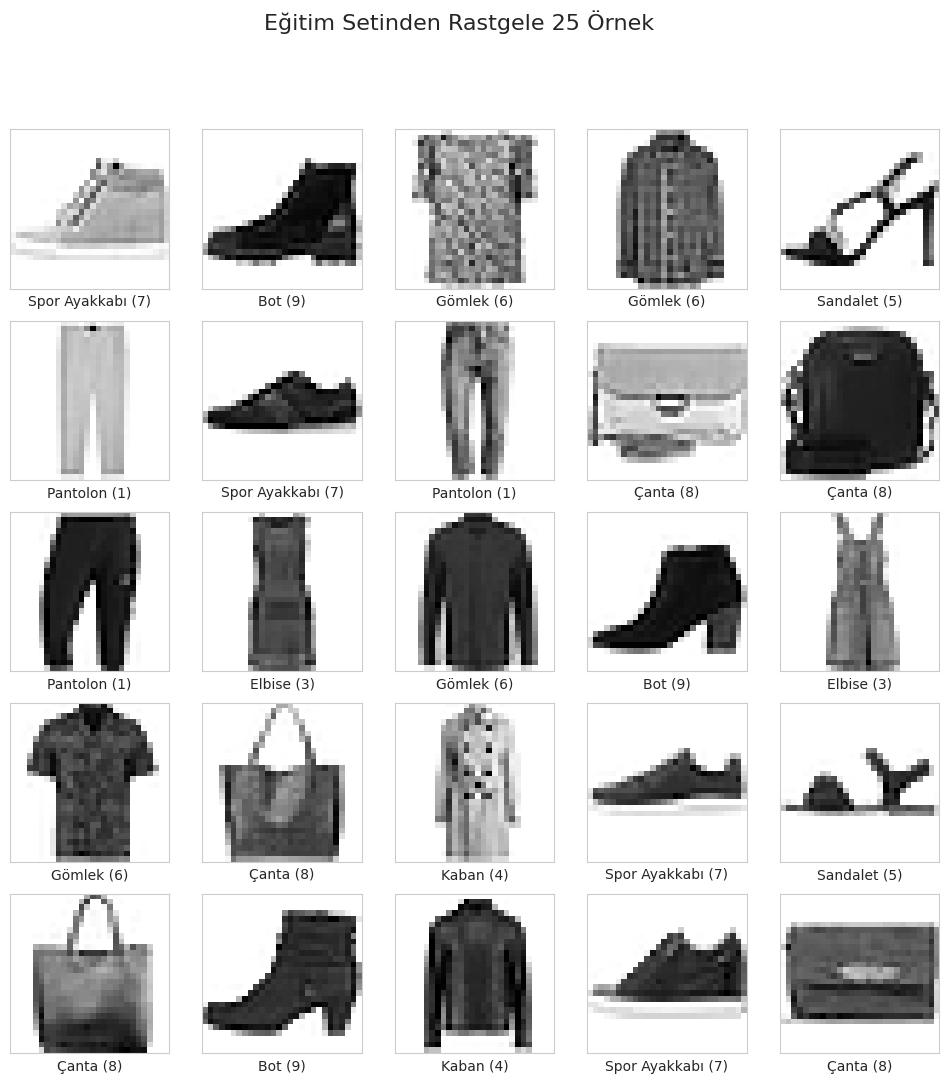


👻 SINIFLARIN 'ORTALAMA' (HAYALET) GÖRÜNTÜLERİ:
Model aslında bu şablonları öğrenmeye çalışır...


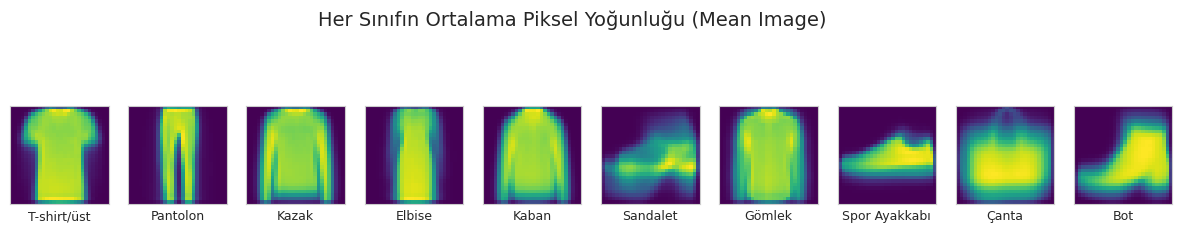


📈 PİKSEL DEĞER DAĞILIMI:


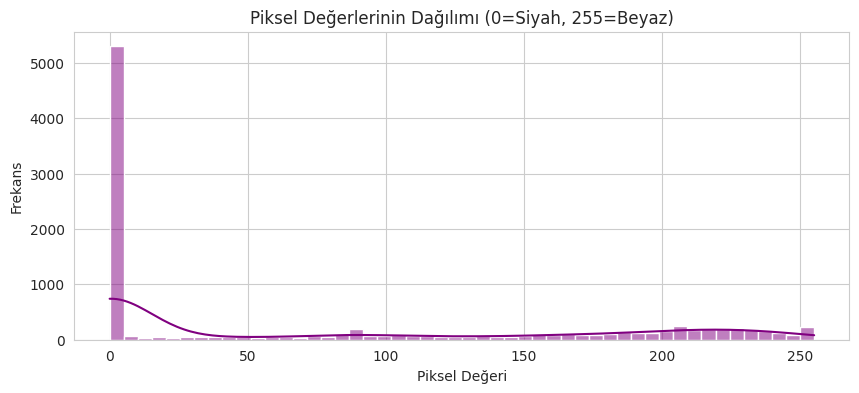

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Görselleştirme Ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("📦 Veri Seti İndiriliyor ve Hazırlanıyor...")

# 1. VERİYİ YÜKLE
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Etiket İsimleri (0-9 arası sayıların karşılığı)
class_names = ['T-shirt/üst', 'Pantolon', 'Kazak', 'Elbise', 'Kaban',
               'Sandalet', 'Gömlek', 'Spor Ayakkabı', 'Çanta', 'Bot']

# --- A. VERİ SETİ TABLOSU ---
print("\n📊 İSTATİSTİKSEL ÖZET:")

# Sınıf dağılımını hesapla
unique, counts = np.unique(y_train, return_counts=True)
df_stats = pd.DataFrame({
    'Sınıf ID': unique,
    'Sınıf Adı': [class_names[i] for i in unique],
    'Örnek Sayısı (Train)': counts,
    'Örnek Sayısı (Test)': np.unique(y_test, return_counts=True)[1]
})

# Veri boyutları ve tip bilgisi
print(f"Eğitim Seti Boyutu: {x_train.shape} (60.000 resim, 28x28 piksel)")
print(f"Test Seti Boyutu:   {x_test.shape}")
print(f"Piksel Aralığı:     {x_train.min()} - {x_train.max()} (Normalize edilmemiş)")
print("-" * 60)
print(df_stats.to_markdown(index=False))
print("-" * 60)

# --- B. RASTGELE ÖRNEKLER GALERİSİ ---
print("\n🖼️ RASTGELE ÖRNEKLER GALERİSİ:")

plt.figure(figsize=(12, 12))
for i in range(25):
    idx = np.random.randint(0, len(x_train)) # Rastgele bir resim seç
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Resmi göster (binary = siyah beyaz)
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    # Altına etiketini yaz
    plt.xlabel(f"{class_names[y_train[idx]]} ({y_train[idx]})")
plt.suptitle("Eğitim Setinden Rastgele 25 Örnek", fontsize=16)
plt.show()

# --- C. ORTALAMA "HAYALET" GÖRÜNTÜLER ---
# Bu kısım çok ilginçtir: Her sınıfın tüm resimlerinin ortalamasını alırsak
# o sınıfın "genel yapısını" (template) görürüz.
print("\n👻 SINIFLARIN 'ORTALAMA' (HAYALET) GÖRÜNTÜLERİ:")
print("Model aslında bu şablonları öğrenmeye çalışır...")

plt.figure(figsize=(15, 3))
for i in range(10):
    # Sadece o sınıfa ait resimleri çek
    class_images = x_train[y_train == i]
    # Ortalamasını al (Axis 0 boyunca)
    avg_img = np.mean(class_images, axis=0)

    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(avg_img, cmap='viridis') # Isı haritası gibi göster
    plt.xlabel(class_names[i], fontsize=9)

plt.suptitle("Her Sınıfın Ortalama Piksel Yoğunluğu (Mean Image)", fontsize=14)
plt.show()

# --- D. PİKSEL YOĞUNLUK DAĞILIMI ---
print("\n📈 PİKSEL DEĞER DAĞILIMI:")
plt.figure(figsize=(10, 4))
# Veriyi düzleştir (flatten) ve histogram çiz
sns.histplot(x_train.flatten()[:10000], bins=50, color='purple', kde=True)
plt.title("Piksel Değerlerinin Dağılımı (0=Siyah, 255=Beyaz)")
plt.xlabel("Piksel Değeri")
plt.ylabel("Frekans")
plt.show()

👗 Moda Tasarımcısı Ajanı Hazırlanıyor...

🚀 Arama Başlıyor! Toplam 15 farklı mimari denenecek.



Mimari Aranıyor:   0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Mimari Aranıyor: 100%|██████████| 15/15 [01:19<00:00,  5.32s/it, Son Ödül (Acc)=%66.20]




✅ Arama Tamamlandı! Süre: 1.3 dakika.

🏆 BULUNAN EN İYİ MİMARİ (Acc: %71.94)
| filter_1   | kernel_1   | activation   | dropout_rate   | dense_units   |
|:-----------|:-----------|:-------------|:---------------|:--------------|
| 32         | 5          | elu          | 0.2            | 128           |

🏋️ En iyi model şimdi TÜM veri seti ile eğitiliyor...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7601 - loss: 0.6745 - val_accuracy: 0.8675 - val_loss: 0.3584
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8805 - loss: 0.3315 - val_accuracy: 0.8860 - val_loss: 0.3105
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8946 - loss: 0.2884 - val_accuracy: 0.8875 - val_loss: 0.3037
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9070 - loss: 0.2504 - val_accuracy: 0.8983 - val_loss: 0.2653
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9174 - loss: 0.2265 - val_accuracy: 0.9038 - val_loss: 0.2562

✨

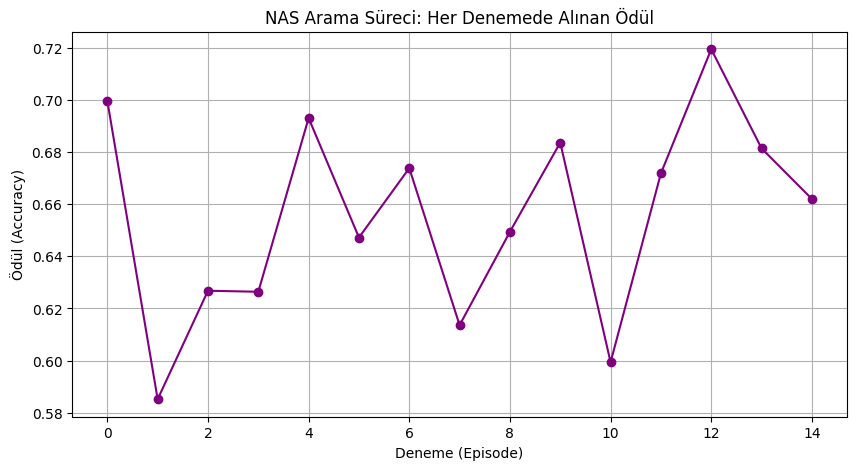

In [ ]:
##########NASNet (Neural Architecture Search Network)############################

#Ajanımız bir moda eleştirmeni. Rastgele filtre boyutları ve katman sayıları seçip bir "Model" (Çocuk ağ) oluşturuyor.
#Bu çocuk ağın başarısı (Accuracy) ajanımıza Ödül (Reward) olarak dönüyor. Ajan, yüksek ödül getiren mimari seçimlerini pekiştiriyor.
#Bu örnekte bir "Controller" (Ajanımız), Fashion-MNIST veri seti (kıyafetler) için en iyi CNN mimarisini deneme-yanılma yoluyla (RL kullanarak) bulmaya çalışacak.

import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils
import numpy as np
import random
import pandas as pd
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# --- AYARLAR & HİPERPARAMETRELER ---
MAX_EPISODES = 15      # Ajan kaç farklı mimari denesin? (Süre için 15 ideal)
EPOCHS_PER_CHILD = 1   # Her denemede çocuk model ne kadar eğitilsin? (Hız için 1)
Final_EPOCHS = 5       # En iyi model bulunduktan sonra ne kadar eğitilsin?
PROXY_DATA_LIMIT = 5000 # Hızlanmak için eğitim verisinin sadece bir kısmı kullanılır

# Ajanın seçebileceği "LEGO Parçaları" (Arama Uzayı)
SEARCH_SPACE = {
    "filter_1": [16, 32, 64],        # 1. Conv katmanı filtre sayısı
    "kernel_1": [3, 5],              # 1. Conv katmanı çekirdek boyutu
    "activation": ["relu", "elu"],   # Aktivasyon fonksiyonu
    "dropout_rate": [0.0, 0.2, 0.5], # Dropout oranı
    "dense_units": [32, 64, 128]     # Dense katman nöron sayısı
}

print("👗 Moda Tasarımcısı Ajanı Hazırlanıyor...")

# --- VERİ SETİ (FASHION MNIST) ---
def load_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
    # Normalize et
    train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
    test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

    # Hızlı arama için küçük veri seti (Proxy Task)
    train_subset = train_images[:PROXY_DATA_LIMIT]
    labels_subset = train_labels[:PROXY_DATA_LIMIT]

    return (train_subset, labels_subset), (train_images, train_labels), (test_images, test_labels)

(train_sub, label_sub), (train_full, label_full), (test_imgs, test_lbls) = load_data()

# --- MODEL OLUŞTURUCU (CHILD NETWORK) ---
def build_model(architecture):
    """Verilen mimari parametrelerine göre bir CNN modeli inşa eder."""
    model = models.Sequential()

    # Dinamik Katman 1
    model.add(layers.Conv2D(
        filters=architecture['filter_1'],
        kernel_size=(architecture['kernel_1'], architecture['kernel_1']),
        activation=architecture['activation'],
        input_shape=(28, 28, 1),
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Sabit bir ara katman (Stabilite için)
    model.add(layers.Conv2D(64, (3, 3), activation=architecture['activation']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    # Dinamik Dropout ve Dense
    if architecture['dropout_rate'] > 0:
        model.add(layers.Dropout(architecture['dropout_rate']))

    model.add(layers.Dense(architecture['dense_units'], activation=architecture['activation']))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- BASİT RL AJANI (CONTROLLER) ---
class RandomSearchController:
    """
    Normalde burada bir LSTM policy network olurdu.
    Süre kısıtı ve anlaşılabilirlik için 'Random Search' tabanlı
    ancak geçmişi hatırlayan basit bir yapı kullanıyoruz.
    """
    def __init__(self, search_space):
        self.search_space = search_space
        self.history = []

    def sample_architecture(self):
        """Arama uzayından rastgele bir mimari seçer."""
        arch = {}
        for key, values in self.search_space.items():
            arch[key] = random.choice(values)
        return arch

    def store_result(self, architecture, reward):
        self.history.append({'arch': architecture, 'reward': reward})

    def get_best_architecture(self):
        # Ödüle göre sırala ve en iyisini döndür
        sorted_hist = sorted(self.history, key=lambda x: x['reward'], reverse=True)
        return sorted_hist[0]

# --- EĞİTİM DÖNGÜSÜ (SEARCH PHASE) ---
controller = RandomSearchController(SEARCH_SPACE)
start_time = time.time()

print(f"\n🚀 Arama Başlıyor! Toplam {MAX_EPISODES} farklı mimari denenecek.\n")

# İlerleme çubuğu
pbar = tqdm(range(MAX_EPISODES), desc="Mimari Aranıyor")

for episode in pbar:
    # 1. Ajan bir mimari seçer
    current_arch = controller.sample_architecture()

    # 2. Çocuk model inşa edilir
    tf.keras.backend.clear_session() # RAM temizliği
    model = build_model(current_arch)

    # 3. Hızlıca eğitilir (Proxy Task)
    # Verbose=0 sessiz mod, çıktı kirliliğini önler
    history = model.fit(train_sub, label_sub, epochs=EPOCHS_PER_CHILD, batch_size=64, verbose=0)

    # 4. Ödül hesaplanır (Validation Accuracy)
    # Eğitim setindeki son doğruluk değerini ödül olarak alıyoruz (basitleştirme)
    reward = history.history['accuracy'][-1]

    # 5. Ajan sonuçları kaydeder
    controller.store_result(current_arch, reward)

    # Pbar güncelleme
    pbar.set_postfix({"Son Ödül (Acc)": f"%{reward*100:.2f}"})

search_time = time.time() - start_time
print(f"\n\n✅ Arama Tamamlandı! Süre: {search_time/60:.1f} dakika.")

# --- EN İYİ SONUCU GÖSTER VE EĞİT ---
best_result = controller.get_best_architecture()
best_arch = best_result['arch']
best_reward = best_result['reward']

print("\n" + "="*40)
print(f"🏆 BULUNAN EN İYİ MİMARİ (Acc: %{best_reward*100:.2f})")
print("="*40)
df_res = pd.DataFrame([best_arch])
print(df_res.to_markdown(index=False, numalign="left", stralign="left"))
print("="*40)

print("\n🏋️ En iyi model şimdi TÜM veri seti ile eğitiliyor...")

# En iyi modeli tekrar oluştur ve tam eğitim yap
final_model = build_model(best_arch)
hist_final = final_model.fit(train_full, label_full, epochs=Final_EPOCHS, batch_size=128, validation_split=0.1, verbose=1)

# --- SONUÇ GÖRSELLEŞTİRME ---
print("\n✨ Test Seti Sonuçları:")
test_loss, test_acc = final_model.evaluate(test_imgs, test_lbls, verbose=0)
print(f"Test Accuracy: %{test_acc*100:.2f}")

# Arama süreci grafiği
rewards = [x['reward'] for x in controller.history]
plt.figure(figsize=(10, 5))
plt.plot(rewards, marker='o', linestyle='-', color='purple')
plt.title('NAS Arama Süreci: Her Denemede Alınan Ödül')
plt.xlabel('Deneme (Episode)')
plt.ylabel('Ödül (Accuracy)')
plt.grid(True)
plt.show()

# AmoebaNet

🦠 AmoebaNet (Evrimsel Ajan) Hazırlanıyor...

🌍 İLK POPÜLASYON OLUŞTURULUYOR (5 adet)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   -> Model-0 doğdu. Fitness: %65.82
   -> Model-1 doğdu. Fitness: %71.10
   -> Model-2 doğdu. Fitness: %62.20
   -> Model-3 doğdu. Fitness: %68.48
   -> Model-4 doğdu. Fitness: %68.64

⚔️ EVRİM BAŞLIYOR (Turnuva Seçimi & Mutasyon)...

Jenerasyon 1/15 | Ebeveyn: Model-1 | Mutasyon: activation
   ✅ Çocuk Model-5 (Acc: %72.54) havuza eklendi.
   ⚰️  Model-0 (Yaşlı) havuzdan çıkarıldı.

Jenerasyon 2/15 | Ebeveyn: Model-5 | Mutasyon: activation
   ✅ Çocuk Model-6 (Acc: %71.94) havuza eklendi.
   ⚰️  Model-1 (Yaşlı) havuzdan çıkarıldı.

Jenerasyon 3/15 | Ebeveyn: Model-5 | Mutasyon: filter_1
   ✅ Çocuk Model-7 (Acc: %69.36) havuza eklendi.
   ⚰️  Model-2 (Yaşlı) havuzdan çıkarıldı.

Jenerasyon 4/15 | Ebeveyn: Model-5 | Mutasyon: filter_1
   ✅ Çocuk Model-8 (Acc: %71.70) havuza eklendi.
   ⚰️  Model-3 (Yaşlı) havuzdan çıkarıldı.

Jenerasyon 5/15 | Ebeveyn: Model-5 | Mutasyon: optimizer
   ✅ Çocuk Model-9 (Acc: %70.52) havuza eklendi.
   ⚰️  Model-4 (Yaşlı) havuzdan çıkarıldı.

Jenerasyon 6/1

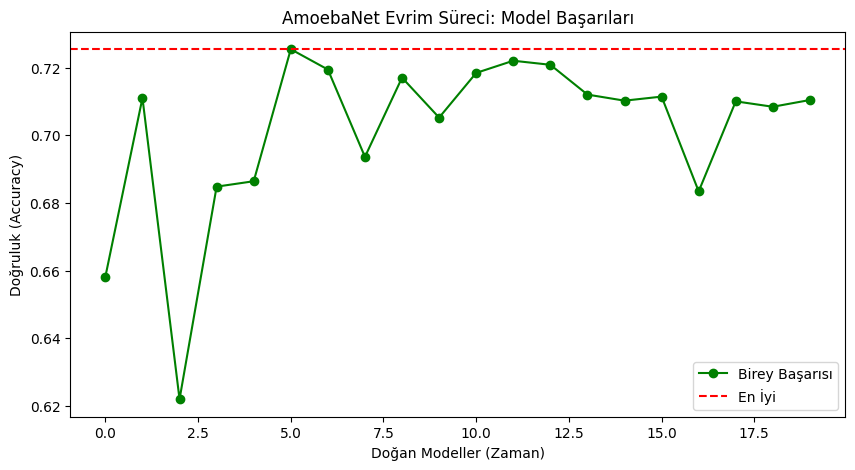


💪 Kral Model tüm veri setiyle eğitiliyor...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7634 - loss: 0.6600 - val_accuracy: 0.8672 - val_loss: 0.3493
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8724 - loss: 0.3534 - val_accuracy: 0.8962 - val_loss: 0.2922
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8909 - loss: 0.2972 - val_accuracy: 0.8983 - val_loss: 0.2779
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8973 - loss: 0.2732 - val_accuracy: 0.9037 - val_loss: 0.2571
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9066 - loss: 0.2507 - val_accuracy: 0.9085 - val_loss: 0.2460

✨ Test Seti Sonucu:
Final Test Accuracy: %90.60


In [ ]:
#AmoebaNet, Google'ın "Evrimsel Algoritmalar (Evolutionary Algorithms)" kullanarak geliştirdiği ve NASNet (RL tabanlı) ile yarışan, hatta onu geçen meşhur modelidir.

#(genlerini/parametrelerini biraz değiştireceğiz) ve en yaşlı/zayıf modelleri havuzdan atacağız.


import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import random
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import deque

# --- AYARLAR & EVRİM HİPERPARAMETRELERİ ---
POPULATION_SIZE = 5     # Havuzda aynı anda kaç model yaşasın?
TOURNAMENT_SIZE = 3     # Eşleşme için kaç model rastgele seçilsin?
MAX_GENERATIONS = 15    # Kaç yeni çocuk (mutasyon) üretilsin?
EPOCHS_SEARCH = 1       # Arama sırasında eğitim süresi (Hız için)
FINAL_EPOCHS = 5        # Final eğitimi
PROXY_LIMIT = 5000      # Hız için veri limiti

# DNA (Arama Uzayı) - Genetik Kodlar
GENE_POOL = {
    "filter_1": [16, 32, 64],
    "kernel_1": [3, 5],
    "activation": ["relu", "elu", "selu"],
    "dropout_rate": [0.0, 0.25, 0.5],
    "dense_units": [32, 64, 128],
    "optimizer": ["adam", "rmsprop"] # Bu sefer optimizer'ı da evrime ekledik!
}

print("🦠 AmoebaNet (Evrimsel Ajan) Hazırlanıyor...")

# --- VERİ SETİ (FASHION MNIST) ---
def load_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
    train_images = train_images.reshape((-1, 28, 28, 1)).astype("float32") / 255
    test_images = test_images.reshape((-1, 28, 28, 1)).astype("float32") / 255

    # Proxy Veri Seti
    indices = np.arange(len(train_images))
    np.random.shuffle(indices)
    subset_idx = indices[:PROXY_LIMIT]

    return (train_images[subset_idx], train_labels[subset_idx]), (train_images, train_labels), (test_images, test_labels)

(train_sub, label_sub), (train_full, label_full), (test_imgs, test_lbls) = load_data()

# --- MODEL OLUŞTURUCU (DNA -> CANLI) ---
def build_and_compile(dna):
    """DNA sözlüğünü alır ve canlı bir model döndürür."""
    model = models.Sequential()

    model.add(layers.Conv2D(dna['filter_1'], (dna['kernel_1'], dna['kernel_1']), padding='same', input_shape=(28,28,1)))
    model.add(layers.Activation(dna['activation']))
    model.add(layers.MaxPooling2D((2, 2)))

    # Sabit gövde (Body)
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.Activation(dna['activation'])) # Aktivasyon geni burayı da etkiliyor
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    if dna['dropout_rate'] > 0:
        model.add(layers.Dropout(dna['dropout_rate']))

    model.add(layers.Dense(dna['dense_units']))
    model.add(layers.Activation(dna['activation']))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=dna['optimizer'],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- EVRİMSEL FONKSİYONLAR ---

def random_dna():
    """Tamamen rastgele bir DNA oluşturur (İlk popülasyon için)."""
    return {k: random.choice(v) for k, v in GENE_POOL.items()}

def mutate(parent_dna):
    """Ebeveynin DNA'sını alır ve tek bir genini değiştirir."""
    child_dna = parent_dna.copy()
    mutation_key = random.choice(list(GENE_POOL.keys())) # Hangi gen değişecek?

    # Mevcut değerden farklı yeni bir değer seç
    possible_values = [v for v in GENE_POOL[mutation_key] if v != parent_dna[mutation_key]]

    # Eğer alternatif yoksa (örn: listede tek eleman varsa) aynısı kalır, aksi halde değiştir
    if possible_values:
        child_dna[mutation_key] = random.choice(possible_values)

    return child_dna, mutation_key

def evaluate_model(dna, verbose=0):
    """Modeli oluşturur, eğitir ve fitness (accuracy) döndürür."""
    tf.keras.backend.clear_session()
    model = build_and_compile(dna)
    hist = model.fit(train_sub, label_sub, epochs=EPOCHS_SEARCH, batch_size=64, verbose=verbose)
    return hist.history['accuracy'][-1]

# --- ANA EVRİM DÖNGÜSÜ (AGING EVOLUTION) ---
# AmoebaNet "Aging Evolution" kullanır: En yaşlıyı atar.

print(f"\n🌍 İLK POPÜLASYON OLUŞTURULUYOR ({POPULATION_SIZE} adet)...")
population = [] # Liste elemanları: {'dna': dict, 'fitness': float, 'id': int}
history_log = []

start_time = time.time()

# 1. Başlangıç Popülasyonunu Rastgele Doldur
for i in range(POPULATION_SIZE):
    dna = random_dna()
    acc = evaluate_model(dna)
    individual = {'dna': dna, 'fitness': acc, 'id': i}
    population.append(individual)
    history_log.append(individual)
    print(f"   -> Model-{i} doğdu. Fitness: %{acc*100:.2f}")

print("\n⚔️ EVRİM BAŞLIYOR (Turnuva Seçimi & Mutasyon)...\n")

model_counter = POPULATION_SIZE

for gen in range(MAX_GENERATIONS):
    # A. Turnuva Seçimi: Rastgele k birey seç, en iyisini ebeveyn yap
    tournament = random.sample(population, TOURNAMENT_SIZE)
    parent = max(tournament, key=lambda x: x['fitness'])

    # B. Mutasyon: Ebeveynden çocuk üret
    child_dna, mutated_gene = mutate(parent['dna'])

    # C. Değerlendirme
    print(f"Jenerasyon {gen+1}/{MAX_GENERATIONS} | Ebeveyn: Model-{parent['id']} | Mutasyon: {mutated_gene}")
    child_acc = evaluate_model(child_dna)

    child = {'dna': child_dna, 'fitness': child_acc, 'id': model_counter}
    model_counter += 1

    # D. Nüfus Kontrolü (Aging Evolution):
    # En yaşlı bireyi (listenin başındaki) popülasyondan çıkar, yeniyi sona ekle.
    removed = population.pop(0)
    population.append(child)
    history_log.append(child)

    print(f"   ✅ Çocuk Model-{child['id']} (Acc: %{child_acc*100:.2f}) havuza eklendi.")
    print(f"   ⚰️  Model-{removed['id']} (Yaşlı) havuzdan çıkarıldı.\n")

total_time = time.time() - start_time
print(f"🏁 Evrim Tamamlandı! Süre: {total_time/60:.1f} dk.")

# --- EN İYİ BİREYİ BUL VE GÖSTER ---
best_individual = max(history_log, key=lambda x: x['fitness'])

print("\n" + "="*50)
print(f"👑 EVRİMİN KRALI: Model-{best_individual['id']}")
print(f"🏆 Proxy Accuracy: %{best_individual['fitness']*100:.2f}")
print("="*50)
df_best = pd.DataFrame([best_individual['dna']])
print(df_best.to_markdown(index=False, numalign="left", stralign="left"))
print("="*50)

# --- SONUÇLARI GÖRSELLEŞTİR ---
accuracies = [x['fitness'] for x in history_log]
plt.figure(figsize=(10, 5))
plt.plot(accuracies, marker='o', linestyle='-', color='green', label='Birey Başarısı')
plt.axhline(y=max(accuracies), color='r', linestyle='--', label='En İyi')
plt.title('AmoebaNet Evrim Süreci: Model Başarıları')
plt.xlabel('Doğan Modeller (Zaman)')
plt.ylabel('Doğruluk (Accuracy)')
plt.legend()
plt.show()

# --- FİNAL EĞİTİM ---
print("\n💪 Kral Model tüm veri setiyle eğitiliyor...")
final_model = build_and_compile(best_individual['dna'])
final_model.fit(train_full, label_full, epochs=FINAL_EPOCHS, batch_size=128, validation_split=0.1, verbose=1)

print("\n✨ Test Seti Sonucu:")
loss, acc = final_model.evaluate(test_imgs, test_lbls, verbose=0)
print(f"Final Test Accuracy: %{acc*100:.2f}")